# Data Loading and DataFrame/DataSeries Generation

We're going to load all the image data into an xarray data series object.  We'll also do some image manipulation to make sure everything is the same size (via downsampling), and we'll try to grab some metadata out of the DICOM info.  This might get trickier as future data may be 

In [6]:
import matplotlib.pyplot as plt
import SimpleITK as sitk
import sys, os
import numpy as np
from scipy import ndimage as ndi
import skimage as skim
from skimage import feature
import pandas as pd
import xarray as xr
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)
import os
import pickle as pkl
from skimage import morphology



In [2]:
full_data_dir = '/pghbio/dbmi/batmanlab/bpollack/predictElasticity/data/MRE/'
subjects = sorted([x for x in os.listdir(full_data_dir) if x.isdigit()])
subdir_names = ['SE00001','SE00002','SE00003','SE00004','SE00005','SE00006']
sequence_labels = ['T2SS', 'T1Pre', 'T1Pos', 'T2FR', 'elastMsk', 'elast']
extras = ['extra1', 'extra2', 'extra3', 'extra4']

In [31]:
ds = pkl.load(open(full_data_dir+'mre_ds_transform_2.p', 'rb'))

In [61]:
ds = ds.drop(['extra2','extra3','extra4'], dim='sequence')

In [62]:
df = ds.to_dataframe()

In [63]:
df.head()

images  ages
sequence slices subject x y              
T2SS     0      365     0 0     0.0    58
                          1     0.0    58
                          2     0.0    58
                          3     0.0    58
                          4     0.0    58

In [64]:
df.reset_index(inplace=True)

In [65]:
df.head()

,sequence,slices,subject,x,y,images,ages
0,T2SS,0,365,0,0,0.0,58
1,T2SS,0,365,0,1,0.0,58
2,T2SS,0,365,0,2,0.0,58
3,T2SS,0,365,0,3,0.0,58
4,T2SS,0,365,0,4,0.0,58


In [66]:
df.query('slices==0 and sequence=="T2SS" and subject=="365"').x.describe()

count    65536.000000
mean       127.500000
std         73.900834
min          0.000000
25%         63.750000
50%        127.500000
75%        191.250000
max        255.000000
Name: x, dtype: float64

In [67]:
df.drop(columns=['x','y'], inplace=True)
df.rename(columns={'images':'pixels'}, inplace=True)

In [68]:
df.head()

,sequence,slices,subject,pixels,ages
0,T2SS,0,365,0.0,58
1,T2SS,0,365,0.0,58
2,T2SS,0,365,0.0,58
3,T2SS,0,365,0.0,58
4,T2SS,0,365,0.0,58


In [71]:
df_parsed = df.drop(columns=['ages','slices'])
df_parsed.head()

,sequence,subject,pixels
0,T2SS,365,0.0
1,T2SS,365,0.0
2,T2SS,365,0.0
3,T2SS,365,0.0
4,T2SS,365,0.0


In [89]:
df_parsed = df_parsed.set_index('subject')

In [ ]:
df_parsed.reset_index().pivot(columns='sequence', values='pixels')

/home/bpollack/conda_envs/mre/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


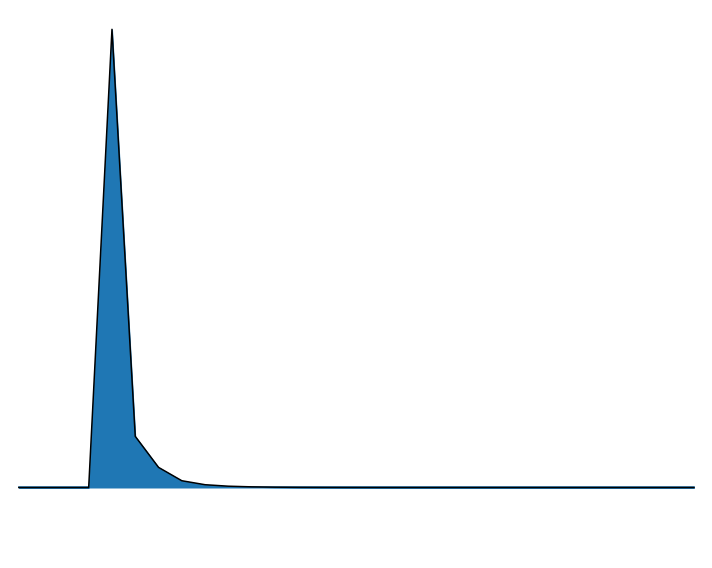

In [72]:
fig, axes = joypy.joyplot(df_parsed, kind="counts", bins=30)

In [76]:
iris = pd.read_csv("../data/iris.csv")


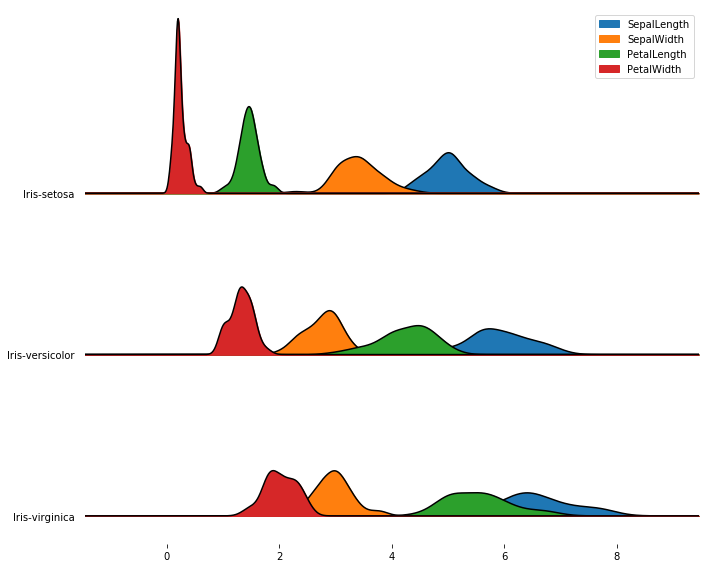

In [78]:
fig, axes = joypy.joyplot(iris, by="Name", legend=True)
